## IN4050 Mandatory Assignment 2, 2025: Supervised Learning

### Rules

Before you begin the exercise, review the rules at this website: https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html , in particular the paragraph on cooperation. This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers with others. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Thursday, October 30, 2025, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a regular Python script if you prefer.

#### Alternative 1
If you prefer not to use notebooks, you should deliver the code, your run results, and a PDF report where you answer all the questions and explain your work.

#### Alternative 2
If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs. (If you can't export: notebook -> latex -> pdf on your own machine, you may do this on the IFI linux machines.)

Here is a list of *absolutely necessary* (but not sufficient) conditions to get the assignment marked as passed:

- You must deliver your code (Python script or Jupyter notebook) you used to solve the assignment.
- The code used for making the output and plots must be included in the assignment. 
- You must include example runs that clearly shows how to run all implemented functions and methods.
- All the code (in notebook cells or python main-blocks) must run. If you have unfinished code that crashes, please comment it out and document what you think causes it to crash. 
- You must also deliver a pdf of the code, outputs, comments and plots as explained above.

Your report/notebook should contain your name and username.

Deliver one single compressed folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

### Goals of the assignment
The goal of this assignment is to get a better understanding of supervised learning with gradient descent. It will, in particular, consider the similarities and differences between linear classifiers and multi-layer feed forward neural networks (multi-layer perceptrons, MLP) and the differences and similarities between binary and multi-class classification. A significant part is dedicated to implementing and understanding the backpropagation algorithm. 

### Tools
The aim of the exercises is to give you a look inside the learning algorithms. You may freely use code from the weekly exercises and the published solutions. You should not use machine learning libraries like Scikit-Learn or PyTorch, because the point of this assignment is for you to implement things from scratch. You, however, are encouraged to use tools like NumPy and Pandas, which are not ML-specific.

The given precode uses NumPy. You are recommended to use NumPy since it results in more compact code, but feel free to use pure Python if you prefer. 

### Beware
This is a revised assignment compared to earlier years. If anything is unclear, do not hesitate to ask. Also, if you think some assumptions are missing, make your own and explain them!

### Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn # This is only to generate a dataset

## Datasets

We start by making a synthetic dataset of 2000 instances and five classes, with 400 instances in each class. (See https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html regarding how the data are generated.) We choose to use a synthetic dataset---and not a set of natural occuring data---because we are mostly interested in properties of the various learning algorithms, in particular the differences between linear classifiers and multi-layer neural networks together with the difference between binary and multi-class data. In addition, we would like a dataset with instances represented with only two numerical features, so that it is easy to visualize the data. It would be rather difficult (although not impossible) to find a real-world dataset of the same nature. Anyway, you surely can use the code in this assignment for training machine learning models on real-world datasets.

When we are doing experiments in supervised learning, and the data are not already split into training and test sets, we should start by splitting the data. Sometimes there are natural ways to split the data, say training on data from one year and testing on data from a later year, but if that is not the case, we should shuffle the data randomly before splitting. (OK, that is not necessary with this particular synthetic data set, since it is already shuffled by default by Scikit-Learn, but that will not be the case with real-world data) We should split the data so that we keep the alignment between X (features) and t (class labels), which may be achieved by shuffling the indices. We split into 50% for training, 25% for validation, and 25% for final testing. The set for final testing *must not be used* till the end of the assignment in part 3.

We fix the seed both for data set generation and for shuffling, so that we work on the same datasets when we rerun the experiments. This is done by the `random_state` argument and the `rng = np.random.RandomState(2024)`.

In [2]:
# Generating the dataset
from sklearn.datasets import make_blobs
X, t_multi = make_blobs(n_samples=[400, 400, 400, 400, 400], centers=[[0,1],[4,2],[8,1],[2,0],[6,0]], 
                  n_features=2, random_state=2024, cluster_std=[1.0, 2.0, 1.0, 0.5, 0.5])

In [3]:
# Shuffling the dataset
indices = np.arange(X.shape[0])
rng = np.random.RandomState(2024)
rng.shuffle(indices)
indices[:10]

array([ 937, 1776,  868, 1282, 1396,  147,  601, 1193, 1789,  547])

In [4]:
# Splitting into train, dev and test
X_train = X[indices[:1000],:]
X_val = X[indices[1000:1500],:]
X_test = X[indices[1500:],:]
t_multi_train = t_multi[indices[:1000]]
t_multi_val = t_multi[indices[1000:1500]]
t_multi_test = t_multi[indices[1500:]]

Next, we will  make a second dataset with only two classes by merging the existing labels in (X,t), so that `0`, `1` and `2` become the new `0` and `3` and `4` become the new `1`. Let's call the new set (X, t2). This will be a binary set.
We now have two datasets:

- Binary set: `(X, t2)`
- Multi-class set: `(X, t_multi)`

In [5]:
t2_train = t_multi_train >= 3
t2_train = t2_train.astype('int')
t2_val = (t_multi_val >= 3).astype('int')
t2_test = (t_multi_test >= 3).astype('int')

We can plot the two traning sets.

Text(0.5, 1.0, 'Multi-class set')

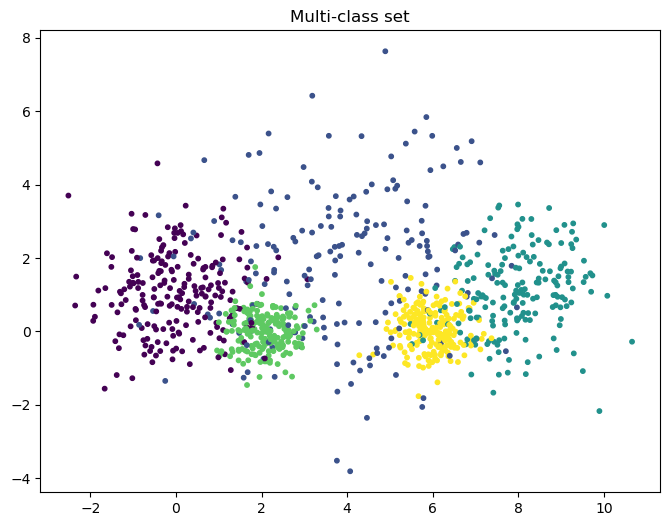

In [6]:
plt.figure(figsize=(8,6)) # You may adjust the size
plt.scatter(X_train[:, 0], X_train[:, 1], c=t_multi_train, s=10.0)
plt.title("Multi-class set")

Text(0.5, 1.0, 'Binary set')

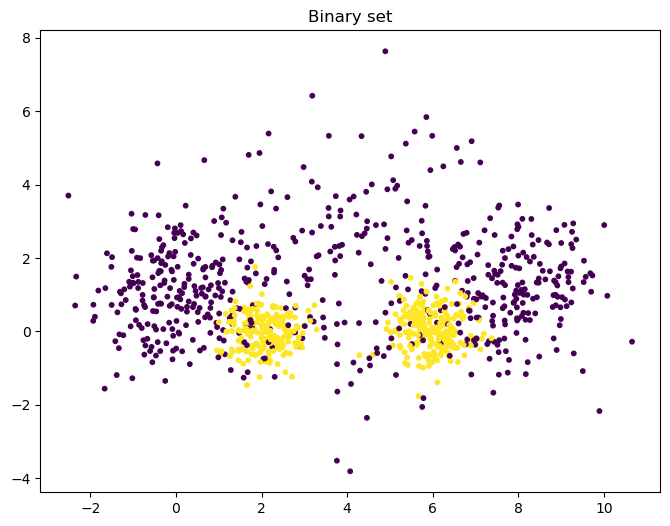

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=t2_train, s=10.0)
plt.title("Binary set")

# Part 1: Linear classifiers
### Linear regression

We see that even the binary set (X, t2) is far from linearly separable, and we will explore how various classifiers are able to handle this. We start with linear regression with the Mean Squared Error (MSE) loss, although it is not the most widely used approach for classification tasks: but we are interested. You may make your own implementation from scratch or start with the solution to the weekly exercise set 7. 
We include it here with a little added flexibility.

In [8]:
def add_bias(X, bias):
    """X is a NxM matrix: N datapoints, M features
    bias is a bias term, -1 or 1, or any other scalar. Use 0 for no bias
    Return a Nx(M+1) matrix with added bias in position zero
    """
    N = X.shape[0]
    biases = np.ones((N, 1)) * bias # Make a N*1 matrix of biases
    # Concatenate the column of biases in front of the columns of X.
    return np.concatenate((biases, X), axis  = 1) 

In [9]:
class NumpyClassifier():
    """Common methods to all Numpy classifiers --- if any"""

In [10]:
class NumpyLinRegClass(NumpyClassifier):

    def __init__(self, bias=-1):
        self.bias=bias
    
    def fit(self, X_train, t_train, lr = 0.1, epochs=10):
        """X_train is a NxM matrix, N data points, M features
        t_train is avector of length N,
        the target class values for the training data
        lr is our learning rate
        """
        
        if self.bias:
            X_train = add_bias(X_train, self.bias)
            
        (N, M) = X_train.shape
        
        self.weights = weights = np.zeros(M)
        
        for epoch in range(epochs):
            # print("Epoch", epoch)
            weights -= lr / N *  X_train.T @ (X_train @ weights - t_train)      
    
    def predict(self, X, threshold=0.5):
        """X is a KxM matrix for some K>=1
        predict the value for each point in X"""
        if self.bias:
            X = add_bias(X, self.bias)
        ys = X @ self.weights
        return ys > threshold

We can train and test a first classifier.

In [11]:
def accuracy(predicted, gold):
    return np.mean(predicted == gold)

In [12]:
cl = NumpyLinRegClass()
cl.fit(X_train, t2_train, epochs=3)
print("Accuracy on the validation set:", accuracy(cl.predict(X_val), t2_val))

Accuracy on the validation set: 0.58


The following is a small procedure which plots the data set together with the decision boundaries. 
You may modify the colors and the rest of the graphics as you like.
The procedure will also work for multi-class classifiers

In [13]:
def plot_decision_regions(X, t, clf=[], size=(8,6)):
    """Plot the data set (X,t) together with the decision boundary of the classifier clf"""
    # The region of the plane to consider determined by X
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Make a prediction of the whole region
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Classify each meshpoint.
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=size) # You may adjust this

    # Put the result into a color plot
    plt.contourf(xx, yy, Z, alpha=0.2, cmap = 'Paired')

    plt.scatter(X[:,0], X[:,1], c=t, s=10.0, cmap='Paired')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision regions")
    plt.xlabel("x0")
    plt.ylabel("x1")

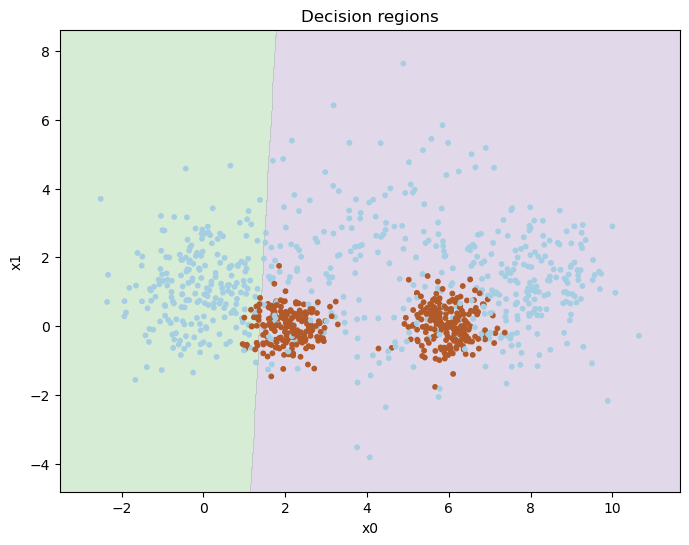

In [14]:
plot_decision_regions(X_train, t2_train, cl)

### Task: Tuning

The result is far from impressive. 
Remember that a classifier which always chooses the majority class will have an accuracy of 0.6 on this data set.

Your task is to try various settings for the two training hyper-parameters, learning rate and the number of epochs, to get the best accuracy on the validation set. 

Report how the accuracy varies with the hyper-parameter settings. It it not sufficient to give the final hyperparameters. You must also show how you found then and results for alternative values you tried aout.

When you are satisfied with the result, you may plot the decision boundaries, as above.

## Finding optimal values
First, lets check each hyperparameter individually to see when the rate of improvement flattens out

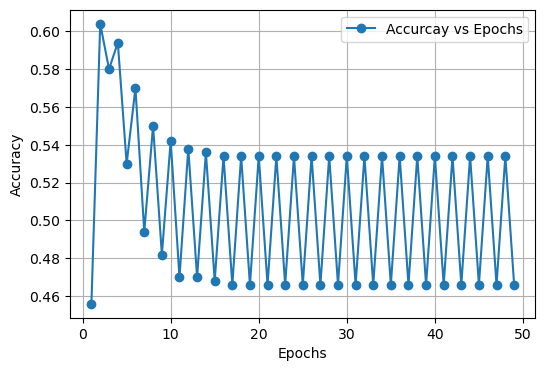

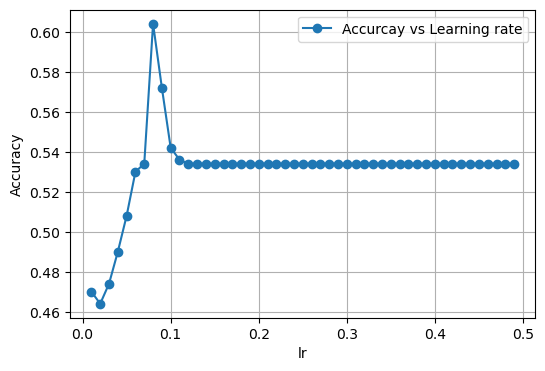

In [15]:
import pandas as pd

# first lets check epochs
Epochs = []
results = []

# test 50 different epoch values
for i in range(1, 50):
    cl = NumpyLinRegClass()
    cl.fit(X_train, t2_train, epochs=i)
    acc = accuracy(cl.predict(X_val), t2_val)
    
    Epochs.append(i)
    results.append(acc)

# Store in a dataframe
df = pd.DataFrame({'Epochs': Epochs, 'Accuracy': results})

# Plot
plt.figure(figsize=(6,4))
plt.plot(df['Epochs'], df['Accuracy'], marker='o', label='Accurcay vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# next lets check learning rate
lr = []
results = []

# test 50 different lr values
for i in range(1, 50):
    cl = NumpyLinRegClass()     
    lr_value = i / 100
    cl.fit(X_train, t2_train, lr=lr_value)
    acc = accuracy(cl.predict(X_val), t2_val)
    
    lr.append(lr_value)
    results.append(acc)

# Store in a dataframe
df = pd.DataFrame({'Learning rate': lr, 'Accuracy': results})

# Plot
plt.figure(figsize=(6,4))
plt.plot(df['Learning rate'], df['Accuracy'], marker='o', label='Accurcay vs Learning rate')
plt.xlabel('lr')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## findings
It seems like Epoch flattens out when it is around 20 and learning rate at around 0.15.
Lets be safe though and say 30 for epochs and 0.2 for learning rate

## Testing all combinations of epochs and learning rate

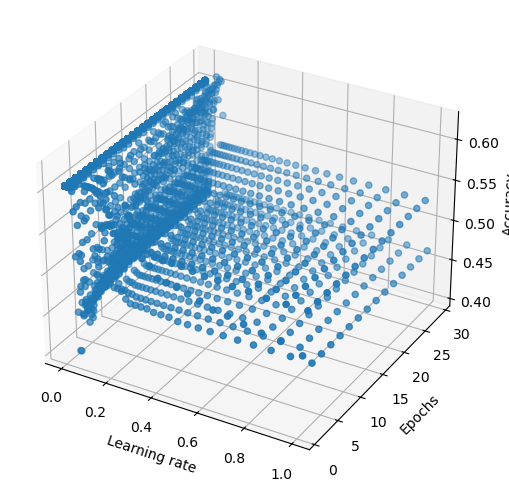

Best: acc=0.6180 at epochs=28, lr=0.07390722033525783


In [16]:
# First, lets make a function for it so we can reuse the code later
def hyper_parameter_sweep (ep_range, lr_range):
    rows = []

    for ep in ep_range:
        for lr_val in lr_range:
            cl = NumpyLinRegClass()
            cl.fit(X_train, t2_train, lr=lr_val, epochs=ep)
            acc = accuracy(cl.predict(X_val), t2_val)
            rows.append({"Epoch": ep, "lr": lr_val, "Accuracy": acc})

    # dataframe
    df = pd.DataFrame(rows)

    # Pivot to a matrix for 3d grpah
    pivot = df.pivot(index="Epoch", columns="lr", values="Accuracy").sort_index(axis=0).sort_index(axis=1)

    # Meshgrid
    X = np.array(pivot.columns)[None, :].repeat(pivot.shape[0], axis=0)  # lr along columns
    Y = np.array(pivot.index)[:, None].repeat(pivot.shape[1], axis=1)    # epochs along rows
    Z = pivot.to_numpy()

    # 3D scatterplot
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['lr'], df['Epoch'], df['Accuracy'])
    ax.set_xlabel('Learning rate')
    ax.set_ylabel('Epochs')
    ax.set_zlabel('Accuracy')
    plt.tight_layout()
    plt.show()

    best = df.loc[df['Accuracy'].idxmax()]
    return best

best = hyper_parameter_sweep(ep_range=range(1, 30), lr_range=np.logspace(-4, 0, 100))
print(f"Best: acc={best['Accuracy']:.4f} at epochs={int(best['Epoch'])}, lr={best['lr']}")

## findings
It seems like epoch does not flatten out at 20 when we try it in combination with different learning rates. Lets ignore the findings from testing epoch individually and test a wider range. For lr though, it is somwhere between 0.07 and 0.08, lets narrow it down.

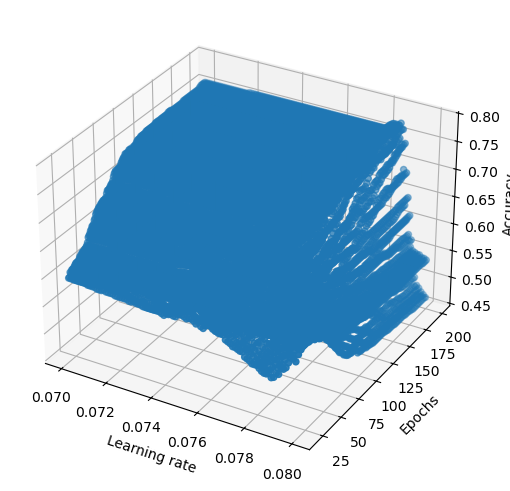

Best: acc=0.7800 at epochs=169, lr=0.07858585858585859


In [17]:
best = hyper_parameter_sweep(
        ep_range=range(20, 200),
        lr_range=np.linspace(0.07, 0.08, 100)
    )
print(f"Best: acc={best['Accuracy']:.4f} at epochs={int(best['Epoch'])}, lr={best['lr']}")

## Conclusion
It looks like the optimal hyperparameters is 169 epochs and a learning rate of ~ 0.0785 (with infinite repeating 85 which equals the fraction 359/4950). It gives us an accuracy of 78%

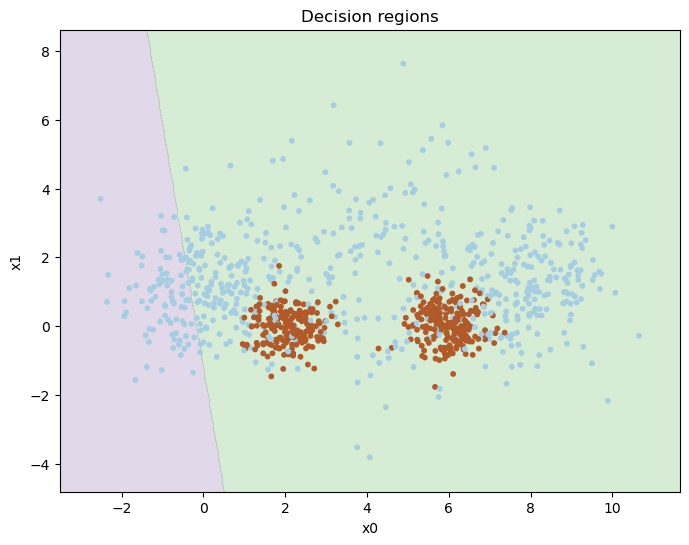

In [18]:
plot_decision_regions(X_train, t2_train, cl)

### Task: Scaling

We have seen in the lectures that scaling the data may improve training speed and sometimes the performance. 

- Implement a scaler, at least the standard scaler (normalizer), but you can also try other techniques
- Scale the data
- Train the model on the scaled data
- Experiment with hyper-parameter settings and see whether you can speed  up  the training.
- Report final hyper-parameter settings and show how you found them.

## Scaling
Lets start by creating a scaler

In [19]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    # computes mean and standard deviation
    def fit(self, X):
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0, ddof=0)
        self.std[self.std == 0] = 1.0
        return self

    # scales the data
    def transform(self, X):
        if self.mean is None or self.std is None:
            raise RuntimeError("Scaler not fitted. Call fit(X_train) first.")
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        return self.fit(X).transform(X)

## Testing the scaler
Now lets just make sure that it works


In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit on train data
X_val_scaled   = scaler.transform(X_val)        # transform validation with train stats

# Unscaled baseline
cl = NumpyLinRegClass()
cl.fit(X_train, t2_train)
acc_unscaled = accuracy(cl.predict(X_val), t2_val)

# Scaled
cl = NumpyLinRegClass()
cl.fit(X_train_scaled, t2_train)
acc_scaled = accuracy(cl.predict(X_val_scaled), t2_val)

print(f"Val accuracy (unscaled): {acc_unscaled:.4f}")
print(f"Val accuracy (scaled)  : {acc_scaled:.4f}")

Val accuracy (unscaled): 0.5420
Val accuracy (scaled)  : 0.6020


## Findings
Scaling the data does infact improve the results. Lets run the same sweep as before on the scaled data to see if we can improve results.

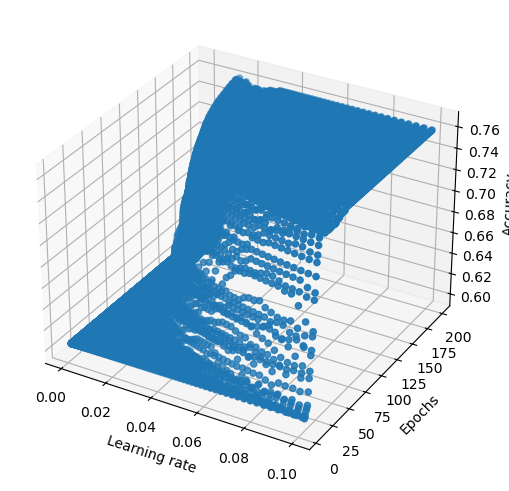

Best: acc=0.7620 at epochs=31, lr=0.09329304026284686


In [21]:
# sweep but for scaled this time
def hyper_parameter_sweep_scaled(ep_range, lr_range):
    rows = []
    for ep in ep_range:
        for lr_val in lr_range:
            cl = NumpyLinRegClass()
            cl.fit(X_train_scaled, t2_train, epochs=int(ep), lr=float(lr_val))
            acc = accuracy(cl.predict(X_val_scaled), t2_val)
            rows.append({"Epoch": ep, "lr": lr_val, "Accuracy": acc})

    df = pd.DataFrame(rows)

    # 3D scatterplot
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['lr'], df['Epoch'], df['Accuracy'])
    ax.set_xlabel('Learning rate')
    ax.set_ylabel('Epochs')
    ax.set_zlabel('Accuracy')
    plt.tight_layout()
    plt.show()

    return df

# run sweep
df_scaled = hyper_parameter_sweep_scaled(
    ep_range=range(5, 200),
    lr_range=np.logspace(-4, -1, 200)
)

best = df_scaled.loc[df_scaled['Accuracy'].idxmax()]

print(f"Best: acc={best['Accuracy']:.4f} at epochs={int(best['Epoch'])}, lr={best['lr']}")

## findings
We defininatly found the optimum in fewer epochs. It seems to plateu at accuracy of 0.762, Which is slightly worse than unscaled data. Lets see how few epochs we could do it in though.

In [22]:
for ep in range(1, 15):
    for lr_val in np.linspace(0.001, 0.2, 1000):
        cl = NumpyLinRegClass()
        cl.fit(X_train_scaled, t2_train, epochs=int(ep), lr=float(lr_val))
        acc = accuracy(cl.predict(X_val_scaled), t2_val)
        if acc >= 0.762:
            print("Found Accuraccy of", acc, "with:")
            print("Epochs:", ep, "Learning rate:", lr_val)
            break
        

Found Accuraccy of 0.762 with:
Epochs: 14 Learning rate: 0.19262962962962965


## Conclusion
We can hit the accuracy of 0.762 with 14 epochs and a learning rate of ~ 0.19. Which means it finds a slightly worse optimum, but in far fewer steps (14 rather than 169) which means it is far faster for slightly worse results.  

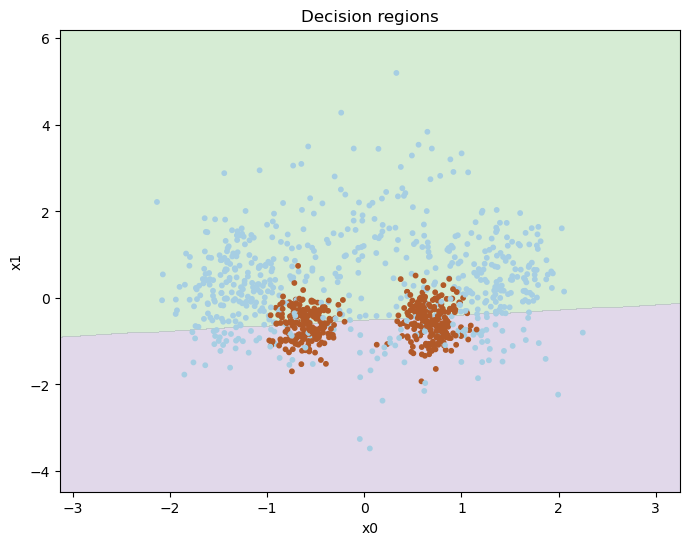

In [23]:
plot_decision_regions(X_train_scaled, t2_train, cl)

## Logistic regression
a) You should now implement a logistic regression classifier similarly to the classifier based on linear regression.
You may use the code from the solution to weekly exercise set week07.

b) In addition to the method `predict()` which predicts a class for the data, include a method `predict_probability()` which predict the probability of the data belonging to the positive class.

c) So far, we have not calculated the loss explicitly in the code. Extend the code to calculate the loss on the training set for each epoch and to store the losses such that the losses can be inspected after training. The prefered loss for logistic regression is binary cross-entropy, but you can also try mean squared error. The most important is that your implementation of the loss corresponds to your implementation of the gradient descent.
Also, calculate and store accuracies after each epoch.

d) In addition, extend the `fit()` method with optional arguments for a validation set (X_val, t_val). If a validation set is included in the call to `fit()`, calculate the loss and the accuracy for the validation set after each epoch. 

e) The training runs for a number of epochs. We cannot know beforehand for how many epochs it is reasonable to run the training. One possibility is to run the training until the learning does not improve much. Extend the `fit()` method with two keyword arguments, `tol` (tolerance) and `n_epochs_no_update` and stop training when the loss has not improved with more than `tol` after `n_epochs_no_update`. A possible default value for `n_epochs_no_update` is 5. Also, add an attribute to the classifier which tells us after fitting how many epochs it was trained for.

f) Train classifiers with various learning rates, and with varying values for `tol` for finding the optimal values. Also consider the effect of scaling the data.

g) After a succesful training, for your best model, plot both training loss and validation loss as functions of the number of epochs in one figure, and both training and validation accuracies as functions of the number of epochs in another figure. Comment on what you see. Are the curves monotone? Is this as expected?

## Creating the class
First, lets create the class that holds all the functions for logistical regression

In [24]:
import numpy as np

class NumpyLogRegClass:
    def __init__(self, bias=-1, loss='bce'):
        self.bias = bias
        self.loss_name = loss
        self.weights = None
        self.train_loss_, self.train_acc_ = [], []
        self.val_loss_,   self.val_acc_   = [], []
        self.n_epochs_trained_ = 0

    @staticmethod
    def _sigmoid(z):
        out = np.empty_like(z, dtype=float)
        pos = z >= 0
        neg = ~pos
        out[pos] = 1.0 / (1.0 + np.exp(-z[pos]))
        ez = np.exp(z[neg])
        out[neg] = ez / (1.0 + ez)
        return out

    @staticmethod
    def _bce_loss(p, y, eps=1e-12):
        p = np.clip(p, eps, 1.0 - eps)
        return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

    @staticmethod
    def _mse_loss(p, y):
        return np.mean((p - y) ** 2)

    def predict_probability(self, X):
        if self.bias:
            X = add_bias(X, self.bias)
        logits = X @ self.weights
        return self._sigmoid(logits)

    def predict(self, X, threshold=0.5):
        p = self.predict_probability(X)
        return (p > threshold).astype(int)

    def _compute_metrics(self, X, y):
        p = self.predict_probability(X)
        if self.loss_name == 'bce':
            loss = self._bce_loss(p, y)
        elif self.loss_name == 'mse':
            loss = self._mse_loss(p, y)
        else:
            raise ValueError("loss must be 'bce' or 'mse'")
        acc = np.mean((p > 0.5) == y)
        return loss, acc

    def fit(self, X_train, t_train, lr=0.1, epochs=100,
            X_val=None, t_val=None,
            tol=0.0, n_epochs_no_update=5):
        if self.bias:
            Xtr = add_bias(X_train, self.bias)
            Xv  = add_bias(X_val,   self.bias) if X_val is not None else None
        else:
            Xtr = X_train
            Xv  = X_val

        N, M = Xtr.shape
        self.weights = np.zeros(M, dtype=float)

        best_metric = np.inf
        best_weights = None
        patience = 0
        monitor_val = X_val is not None and t_val is not None

        self.train_loss_.clear(); self.train_acc_.clear()
        self.val_loss_.clear();   self.val_acc_.clear()

        for epoch in range(1, epochs + 1):
            # forward
            logits = Xtr @ self.weights
            p = self._sigmoid(logits)

            # choose gradient depending on loss
            if self.loss_name == 'bce':
                # gradient of BCE wrt weights for sigmoid outputs
                grad = (Xtr.T @ (p - t_train)) / N
            elif self.loss_name == 'mse':
                # MSE on probabilities (sigmoid)
                grad = (Xtr.T @ (p - t_train) * p * (1 - p)) / N
            else:
                raise ValueError("loss must be 'bce' or 'mse'")

            # update
            self.weights -= lr * grad

            # logging
            tr_loss, tr_acc = self._compute_metrics(X_train, t_train)
            self.train_loss_.append(tr_loss)
            self.train_acc_.append(tr_acc)

            if monitor_val:
                vl_loss, vl_acc = self._compute_metrics(X_val, t_val)
                self.val_loss_.append(vl_loss)
                self.val_acc_.append(vl_acc)
                metric = vl_loss
            else:
                metric = tr_loss

            # early stopping check
            if tol > 0.0:
                if metric + tol < best_metric:
                    best_metric = metric
                    best_weights = self.weights.copy()
                    patience = 0
                else:
                    patience += 1
                    if patience >= n_epochs_no_update:
                        # restore best weights if we had any improvement
                        if best_weights is not None:
                            self.weights = best_weights
                        self.n_epochs_trained_ = epoch
                        return self

        self.n_epochs_trained_ = epochs
        return self

## Testing
lets test the model. Logistic regression is trained on the scaled data with binary cross-entropy loss, using early stopping (tol=1e-4, n_epochs_no_update=5) to prevent overfitting.

In [25]:
# Scale data
scaler = StandardScaler()      
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)

# Train on scaled data, with validation & early stopping on BCE
log_cl = NumpyLogRegClass(bias=-1, loss='bce')
log_cl.fit(X_train_s, t2_train, lr=0.05, epochs=500,
           X_val=X_val_s, t_val=t2_val,
           tol=1e-4, n_epochs_no_update=5)

print("Trained epochs:", log_cl.n_epochs_trained_)
print("Val accuracy:", accuracy(log_cl.predict(X_val_s), t2_val))

Trained epochs: 500
Val accuracy: 0.762


## PLotting
lets plot training and validation loss, as well as accuracy, against the number of epochs.

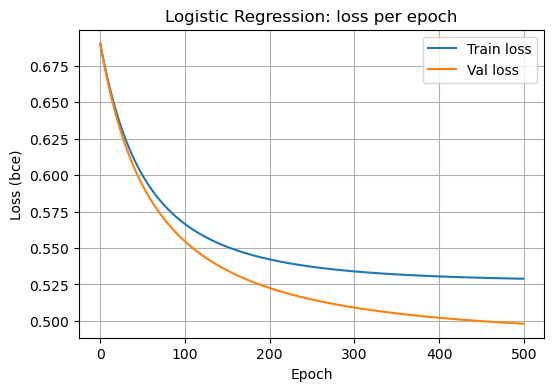

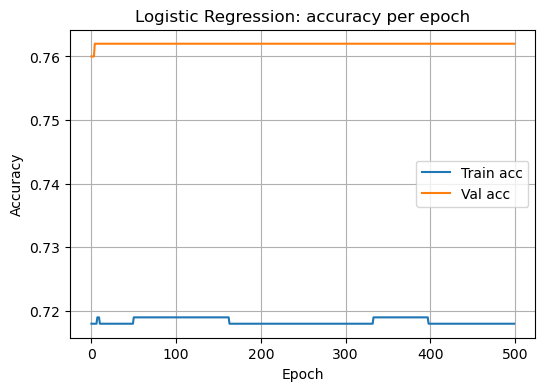

In [26]:
import matplotlib.pyplot as plt

# losses
plt.figure(figsize=(6,4))
plt.plot(log_cl.train_loss_, label='Train loss')
if len(log_cl.val_loss_):
    plt.plot(log_cl.val_loss_, label='Val loss')
plt.xlabel('Epoch')
plt.ylabel(f"Loss ({log_cl.loss_name})")
plt.title('Logistic Regression: loss per epoch')
plt.grid(True); plt.legend(); plt.show()

# accuracies
plt.figure(figsize=(6,4))
plt.plot(log_cl.train_acc_, label='Train acc')
if len(log_cl.val_acc_):
    plt.plot(log_cl.val_acc_, label='Val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Logistic Regression: accuracy per epoch')
plt.grid(True); plt.legend(); plt.show()

## Conclusion
The model quickly found a stable decision boundary—loss kept dropping, but accuracy stayed flat. This means it was already classifying correctly, just becoming more confident.

## Multi-class classifiers
We turn to the task of classifying when there are more than two classes, and the task is to ascribe one class to each input. We will now use the set (X, t_multi).

### "One-vs-rest" with logistic regression
We saw in the lectures how a logistic regression classifier can be turned into a multi-class classifier using the one-vs-rest approach. We train one logistic regression classifier for each class. To predict the class of an item, we run all the binary classifiers and collect the probability score from each of them. We assign the class which ascribes the highest probability.

Build such a classifier. Train the resulting classifier on (X_train, t_multi_train), test it on (X_val, t_multi_val), tune the hyper-parameters and report the accuracy.

Also plot the decision boundaries for your best classifier similarly to the plots for the binary case.

In [27]:
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_val_s   = scaler.transform(X_val)

classes = np.unique(t_multi_train)

## Class for one vs rest

In [28]:
class OneVsRestLogReg:
    def __init__(self, base_kwargs=None):
        self.base_kwargs = base_kwargs or {}
        self.classes_ = None
        self.models_ = []
        self.n_epochs_trained_ = {}

    def fit(self, X, y, lr=0.05, epochs=300, tol=1e-4, n_epochs_no_update=5,
            X_val=None, y_val=None):
        self.classes_ = np.unique(y)
        self.models_.clear()
        self.n_epochs_trained_.clear()

        for c in self.classes_:
            y_bin = (y == c).astype(int)
            yv_bin = (y_val == c).astype(int) if (X_val is not None) else None

            clf = NumpyLogRegClass(**self.base_kwargs)
            clf.fit(X, y_bin, lr=lr, epochs=epochs,
                    X_val=X_val, t_val=yv_bin,
                    tol=tol, n_epochs_no_update=n_epochs_no_update)
            self.models_.append(clf)
            self.n_epochs_trained_[int(c)] = clf.n_epochs_trained_
        return self

    def predict_proba(self, X):
        probs = np.column_stack([m.predict_probability(X) for m in self.models_])
        return probs 

    def predict(self, X):
        probs = self.predict_proba(X)
        idx = np.argmax(probs, axis=1)
        return self.classes_[idx]

## Tuning on scaled data
Lets perform a grid search to find the best hyperparameters (learning rate lr and tolerance tol) for one-vs-rest logistic regression model.

In [29]:
def eval_accuracy(yhat, y):
    return np.mean(yhat == y)

def grid_search_ovr(Xtr, ytr, Xva, yva,
                    lr_list, tol_list, epochs=300, patience=5,
                    base_kwargs=dict(bias=-1, loss='bce')):
    rows = []
    best = None
    best_model = None

    for lr in lr_list:
        for tol in tol_list:
            ovr = OneVsRestLogReg(base_kwargs=base_kwargs)
            ovr.fit(Xtr, ytr, lr=lr, epochs=epochs, tol=tol,
                    n_epochs_no_update=patience, X_val=Xva, y_val=yva)
            acc = eval_accuracy(ovr.predict(Xva), yva)
            rows.append({"lr": lr, "tol": tol, "val_acc": acc,
                         "epochs_trained": dict(ovr.n_epochs_trained_)})
            if (best is None) or (acc > best["val_acc"]):
                best = {"lr": lr, "tol": tol, "val_acc": acc,
                        "epochs_trained": dict(ovr.n_epochs_trained_)}
                best_model = ovr

    return best_model, pd.DataFrame(rows), best

lr_grid  = np.logspace(-3, -1, 6) 
tol_grid = [1e-3, 5e-4, 1e-4]
best_model, results_df, best = grid_search_ovr(
    X_train_s, t_multi_train, X_val_s, t_multi_val,
    lr_list=lr_grid, tol_list=tol_grid, epochs=300, patience=5
)

print(f"\nBEST: acc={best['val_acc']:.4f} with lr={best['lr']:.5f}, tol={best['tol']}, epochs_trained={best['epochs_trained']}")


BEST: acc=0.8320 with lr=0.10000, tol=0.001, epochs_trained={0: 270, 1: 149, 2: 284, 3: 171, 4: 161}


## Findings
It found an accuracy of 0.832 with a learning rate of 0.1, tol of 0.001. Early stopping kicked in at different points for each of the 5 class-specific models.

## Plotting
Lets Retrain the best model using those optimal hyperparameters (lr=0.1, tol=0.001) and Plot the decision boundaries for the validation or training set.

Validation accuracy (OvR, scaled): 0.832
Early-stopped epochs per class: {0: 270, 1: 149, 2: 284, 3: 171, 4: 161}


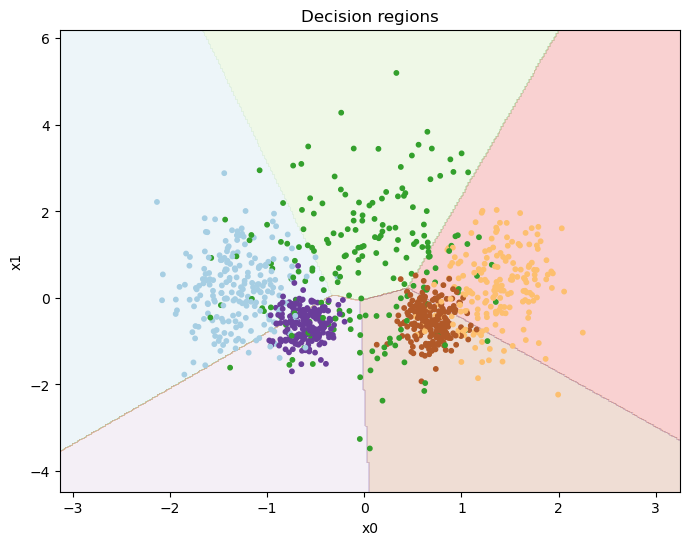

In [30]:
# Refit best OvR model with the tuned hyperparameters
best_lr, best_tol, EPOCHS, PATIENCE = 0.10, 1e-3, 300, 5

best_ovr = OneVsRestLogReg(base_kwargs=dict(bias=-1, loss='bce')).fit(
    X_train_s, t_multi_train,
    lr=best_lr, epochs=EPOCHS, tol=best_tol, n_epochs_no_update=PATIENCE,
    X_val=X_val_s, y_val=t_multi_val
)

# Report validation accuracy and per-class stopping epochs
val_pred = best_ovr.predict(X_val_s)
val_acc  = (val_pred == t_multi_val).mean()
print(f"Validation accuracy (OvR, scaled): {val_acc:.3f}")
print("Early-stopped epochs per class:", best_ovr.n_epochs_trained_)

# Plot decision regions on the SCALED training set
plot_decision_regions(X_train_s, t_multi_train, best_ovr)

## Conclusion
The one-vs-rest logistic regression reached 83.2% accuracy with lr=0.1 and tol=0.001. The decision boundaries are linear and separate most clusters clearly, though some overlap remains where classes intersect. Scaling improved stability, and early stopping prevented unnecessary training for well-separated classes.

### Multinomial logistic regression
In the lectures, we contrasted the one-vs-rest approach with the multinomial logistic regression, also called softmax classifier. Implement also this classifier, tune the parameters, and compare the results to the one-vs-rest classifier. (Don't expect a large difference on a simple task like this.)

Remember that this classifier uses softmax in the forward phase. For loss, it uses categorical cross-entropy loss. The loss has a somewhat simpler form than in the binary case. To calculate the gradient is a little more complicated. The actual gradient and update rule is simple, however, as long as you have calculated the forward values correctly.

## Creating the model
Lets start by making a class for multinomial logistic regrression

In [31]:
class NumpySoftmaxClass:
    def __init__(self, bias=-1):
        self.bias = bias
        self.W = None
        self.classes_ = None
        self.train_loss_, self.train_acc_ = [], []
        self.val_loss_,   self.val_acc_   = [], []
        self.n_epochs_trained_ = 0

    @staticmethod
    def _softmax(Z):
        Zs = Z - Z.max(axis=1, keepdims=True)
        expZ = np.exp(Zs)
        return expZ / expZ.sum(axis=1, keepdims=True)

    @staticmethod
    def _xent(P, Y_onehot, eps=1e-12):
        # categorical cross-entropy
        P = np.clip(P, eps, 1.0 - eps)
        return -np.mean(np.sum(Y_onehot * np.log(P), axis=1))

    def _onehot(self, y):
        idx = {c:i for i,c in enumerate(self.classes_)}
        K = len(self.classes_)
        Y = np.zeros((y.shape[0], K), dtype=float)
        for r, lab in enumerate(y):
            Y[r, idx[lab]] = 1.0
        return Y

    def predict_proba(self, X):
        if self.bias:
            X = add_bias(X, self.bias)
        P = self._softmax(X @ self.W)
        return P

    def predict(self, X):
        P = self.predict_proba(X)
        idx = np.argmax(P, axis=1)
        return self.classes_[idx]

    def _metrics(self, X, y):
        P = self.predict_proba(X)
        Y = self._onehot(y)
        loss = self._xent(P, Y)
        acc  = np.mean(np.argmax(P, axis=1) == np.searchsorted(self.classes_, y))
        # The acc line works because classes_ is sorted and unique. safer alternative:
        acc  = np.mean(self.predict(X) == y)
        return loss, acc

    def fit(self, X_train, y_train, lr=0.05, epochs=300,
            X_val=None, y_val=None, tol=1e-4, n_epochs_no_update=5):
        # class set & design matrices
        self.classes_ = np.unique(y_train)
        if self.bias:
            Xtr = add_bias(X_train, self.bias)
            Xv  = add_bias(X_val,   self.bias) if X_val is not None else None
        else:
            Xtr, Xv = X_train, X_val

        N, M = Xtr.shape
        K = len(self.classes_)
        self.W = np.zeros((M, K), dtype=float)

        Ytr = self._onehot(y_train)
        Yv  = self._onehot(y_val) if (X_val is not None) else None
        monitor_val = (X_val is not None) and (y_val is not None)

        self.train_loss_.clear(); self.train_acc_.clear()
        self.val_loss_.clear();   self.val_acc_.clear()

        best_metric = np.inf
        best_W = None
        patience = 0

        for e in range(1, epochs+1):
            # forward
            P = self._softmax(Xtr @ self.W)
            # gradient
            grad = (Xtr.T @ (P - Ytr)) / N
            # update
            self.W -= lr * grad

            # logging
            tr_loss = self._xent(P, Ytr)
            tr_acc  = np.mean(np.argmax(P, axis=1) == np.argmax(Ytr, axis=1))
            self.train_loss_.append(tr_loss)
            self.train_acc_.append(tr_acc)

            if monitor_val:
                Pv = self._softmax(Xv @ self.W)
                vl_loss = self._xent(Pv, Yv)
                vl_acc  = np.mean(np.argmax(Pv, axis=1) ==
                                  np.argmax(Yv, axis=1))
                self.val_loss_.append(vl_loss)
                self.val_acc_.append(vl_acc)
                metric = vl_loss
            else:
                metric = tr_loss

            # early stopping
            if tol > 0.0:
                if metric + tol < best_metric:
                    best_metric = metric
                    best_W = self.W.copy()
                    patience = 0
                else:
                    patience += 1
                    if patience >= n_epochs_no_update:
                        if best_W is not None:
                            self.W = best_W
                        self.n_epochs_trained_ = e
                        return self

        self.n_epochs_trained_ = epochs
        return self

## Training and tuning

In [32]:
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_val_s   = scaler.transform(X_val)

def eval_acc(model, X, y):
    return np.mean(model.predict(X) == y)

def grid_search_softmax(Xtr, ytr, Xva, yva, lr_list, tol_list,
                        epochs=300, patience=5, bias=-1):
    rows = []
    best = None
    best_model = None
    for lr in lr_list:
        for tol in tol_list:
            sm = NumpySoftmaxClass(bias=bias)
            sm.fit(Xtr, ytr, lr=lr, epochs=epochs,
                   X_val=Xva, y_val=yva, tol=tol, n_epochs_no_update=patience)
            acc = eval_acc(sm, Xva, yva)
            rows.append({"lr": lr, "tol": tol, "val_acc": acc,
                         "epochs_trained": sm.n_epochs_trained_})
            if (best is None) or (acc > best["val_acc"]):
                best = {"lr": lr, "tol": tol, "val_acc": acc,
                        "epochs_trained": sm.n_epochs_trained_}
                best_model = sm
    return best_model, pd.DataFrame(rows), best

# coarse search, then refine
lr_grid  = np.logspace(-3, -1, 6)   # 0.001 … 0.1
tol_grid = [1e-3, 5e-4, 1e-4]

soft_best_model, soft_results, soft_best = grid_search_softmax(
    X_train_s, t_multi_train, X_val_s, t_multi_val,
    lr_list=lr_grid, tol_list=tol_grid, epochs=300, patience=5, bias=-1
)

print(f"\nSoftmax BEST: acc={soft_best['val_acc']:.4f}, "
      f"lr={soft_best['lr']:.5f}, tol={soft_best['tol']}, "
      f"epochs_trained={soft_best['epochs_trained']}")


Softmax BEST: acc=0.8200, lr=0.10000, tol=0.001, epochs_trained=300


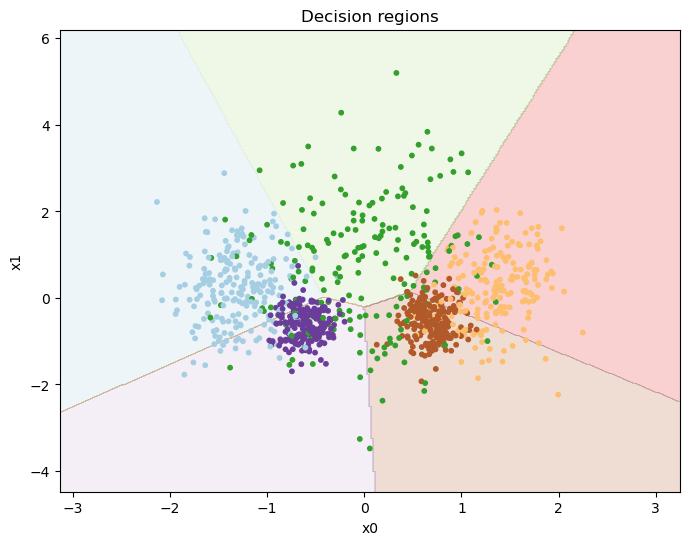

In [33]:
plot_decision_regions(X_train_s, t_multi_train, soft_best_model)

## Findings
Softmax on scaled data reached 82.0% validation accuracy with lr=0.10, tol=0.001. Results are close to OvR (83.2%). softmax ran the full 300 epochs since validation loss kept improving marginally, so early stopping didn’t engage. Decision regions are linear and comparable to OvR

# Part 2: Multi-layer neural networks

## A first non-linear classifier

The following code is a simple implementation of a multi-layer perceptron or feed-forward neural network.
For now, it is quite restricted.
There is only one hidden layer.
It can only handle binary classification.
In addition, it uses a simple final layer similar to the linear regression classifier above.
One way to look at it is what happens when we add a hidden layer to the linear regression classifier.

The MLP class below misses the implementation of the `forward()` function. Your first task is to implement it. 

Remember that in the forward pass, we "feed" the input to the model, the model processes it and produces the output. The function should make use of the logistic activation function and bias.

In [34]:
# First, we define the logistic function and its derivative:
def logistic(x):
    return 1/(1+np.exp(-x))

def logistic_diff(y):
    return y * (1 - y)

In [35]:
class MLPBinaryLinRegClass(NumpyClassifier):
    """A multi-layer neural network with one hidden layer"""
    
    def __init__(self, bias=-1, dim_hidden = 6):
        """Intialize the hyperparameters"""
        self.bias = bias
        # Dimensionality of the hidden layer
        self.dim_hidden = dim_hidden
        
        self.activ = logistic
        
        self.activ_diff = logistic_diff
        
    def forward(self, X):
        hidden_input = X @ self.weights1 
        hidden_output = self.activ(hidden_input)
        hidden_outs = add_bias(hidden_output, self.bias)
        outputs = hidden_outs @ self.weights2
        return hidden_outs, outputs
    
    def fit(self, X_train, t_train, lr=0.001, epochs = 100):
        """Initialize the weights. Train *epochs* many epochs.
        
        X_train is a NxM matrix, N data points, M features
        t_train is a vector of length N of targets values for the training data, 
        where the values are 0 or 1.
        lr is the learning rate
        """
        self.lr = lr
        
        # Turn t_train into a column vector, a N*1 matrix:
        T_train = t_train.reshape(-1,1)
            
        dim_in = X_train.shape[1] 
        dim_out = T_train.shape[1]
        
        # Initialize the weights
        self.weights1 = (np.random.rand(
            dim_in + 1, 
            self.dim_hidden) * 2 - 1)/np.sqrt(dim_in)
        self.weights2 = (np.random.rand(
            self.dim_hidden+1, 
            dim_out) * 2 - 1)/np.sqrt(self.dim_hidden)
        X_train_bias = add_bias(X_train, self.bias)
        
        for e in range(epochs):
            # One epoch
            # The forward step:
            hidden_outs, outputs = self.forward(X_train_bias)
            # The delta term on the output node:
            out_deltas = (outputs - T_train)
            # The delta terms at the output of the hidden layer:
            hiddenout_diffs = out_deltas @ self.weights2.T
            # The deltas at the input to the hidden layer:
            hiddenact_deltas = (hiddenout_diffs[:, 1:] * 
                                self.activ_diff(hidden_outs[:, 1:]))  

            # Update the weights:
            self.weights2 -= self.lr * hidden_outs.T @ out_deltas
            self.weights1 -= self.lr * X_train_bias.T @ hiddenact_deltas 
            
    
    def predict(self, X):
        """Predict the class for the members of X"""
        Z = add_bias(X, self.bias)
        forw = self.forward(Z)[1]
        score= forw[:, 0]
        return (score > 0.5)

## Sanity check
lets just make sure the model runs

Val acc: 0.78


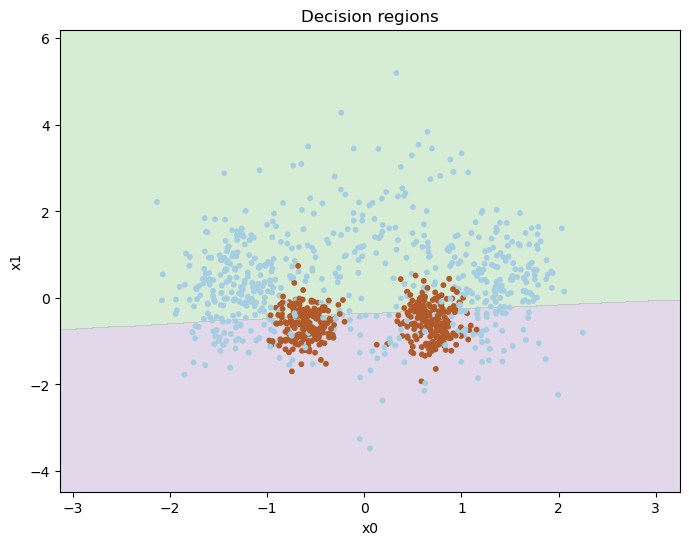

In [36]:
# scale
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_val_s   = scaler.transform(X_val)

mlp = MLPBinaryLinRegClass()
mlp.fit(X_train_s, t2_train, lr=0.001, epochs=200)

print("Val acc:", accuracy(mlp.predict(X_val_s), t2_val))
plot_decision_regions(X_train_s, t2_train, mlp)

## Findings
It seems to work, lets move on

When implemented, this model can be used to make a non-linear classifier for the set `(X, t2)`. Experiment with settings for learning rate and epochs and see how good results you can get. 
Report results for various settings. Be prepared to train for a long time (but you can control it via the number of epochs and hidden size). 

Plot the training set together with the decision regions as in Part I.

## Tweaking settings
We tune hyperparameters to find a good trade-off between accuracy and training time. Since this MLP is stochastic (random weight initialization), runs can land in different local optima and yield different accuracies. To make the sweep comparable, I fix the NumPy seed before each configuration so every setting starts from the same initialization.

Lets start with a hyperparameter sweep like before

/var/folders/nn/z8dl2wm93h5g80b31zrgzjmc0000gn/T/ipykernel_17581/702837997.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/var/folders/nn/z8dl2wm93h5g80b31zrgzjmc0000gn/T/ipykernel_17581/1474910237.py:53: RuntimeWarning: overflow encountered in matmul
  hiddenout_diffs = out_deltas @ self.weights2.T
/var/folders/nn/z8dl2wm93h5g80b31zrgzjmc0000gn/T/ipykernel_17581/1474910237.py:55: RuntimeWarning: invalid value encountered in multiply
  hiddenact_deltas = (hiddenout_diffs[:, 1:] *


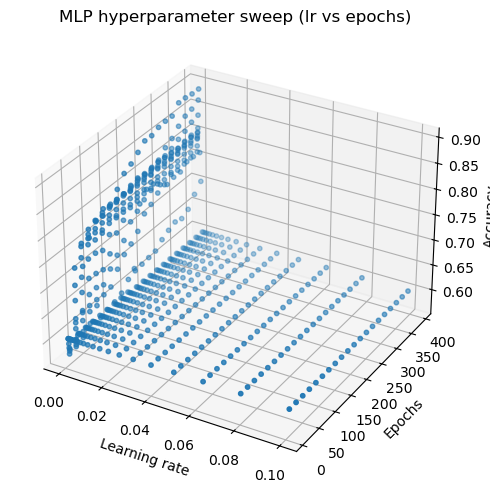

Best: acc=0.8940 at epochs=330, lr=0.00108


In [42]:
rows = []

ep_range = range(10, 400, 20) 
lr_range = np.logspace(-4, -1, 30)

for ep in ep_range:
    for lr in lr_range:
        np.random.seed(42)
        mlp = MLPBinaryLinRegClass()
        mlp.fit(X_train_s, t2_train, lr=lr, epochs=ep)
        acc = accuracy(mlp.predict(X_val_s), t2_val)
        rows.append({"Epoch": ep, "lr": lr, "Accuracy": acc})

df = pd.DataFrame(rows)

# 3D plot
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["lr"], df["Epoch"], df["Accuracy"], s=10)
ax.set_xlabel("Learning rate")
ax.set_ylabel("Epochs")
ax.set_zlabel("Accuracy")
plt.title("MLP hyperparameter sweep (lr vs epochs)")
plt.tight_layout()
plt.show()

best = df.loc[df["Accuracy"].idxmax()]
print(f"Best: acc={best['Accuracy']:.4f} at epochs={int(best['Epoch'])}, lr={best['lr']:.5f}")

## sweep findings
It found the rough optimal hyperparameters, and were allready at 90% accuracy. Lets narrow it down a bit further to see if we can optimize even further.

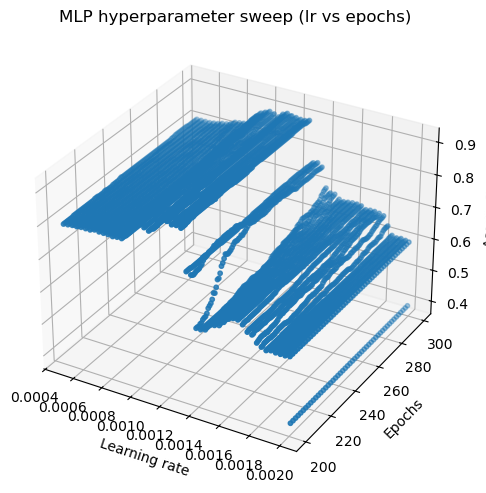

Best: acc=0.9060 at epochs=226, lr=0.00117


In [40]:
rows = []

# Narrow search region around previous best
ep_range = range(200, 300)                          
lr_range = np.linspace(0.0005, 0.002, 50)         

for ep in ep_range:
    for lr in lr_range:
        np.random.seed(42)
        mlp = MLPBinaryLinRegClass()
        mlp.fit(X_train_s, t2_train, lr=lr, epochs=ep)
        acc = accuracy(mlp.predict(X_val_s), t2_val)
        rows.append({"Epoch": ep, "lr": lr, "Accuracy": acc})

df = pd.DataFrame(rows)

# 3D plot
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["lr"], df["Epoch"], df["Accuracy"], s=10)
ax.set_xlabel("Learning rate")
ax.set_ylabel("Epochs")
ax.set_zlabel("Accuracy")
plt.title("MLP hyperparameter sweep (lr vs epochs)")
plt.tight_layout()
plt.show()

best = df.loc[df["Accuracy"].idxmax()]
print(f"Best: acc={best['Accuracy']:.4f} at epochs={int(best['Epoch'])}, lr={best['lr']:.5f}")

## Findings
We found a slightly better (.66% improvement) accuracy. We could maybe go even higher with the epochs, but I dont think it will improve by enough to be worth the increase in time. Lets loch in 226 epochs and lr of 0.00117

In [41]:
best_lr = 0.00117
best_ep = 226

## sweeping Bias and Hidden values

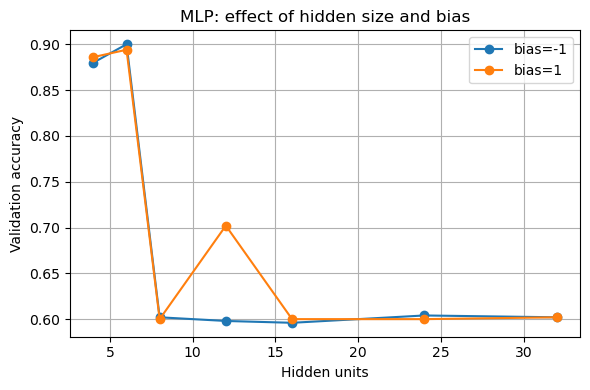

Best: acc=0.9000 at hidden=6, bias=-1
Val acc (best MLP): 0.872


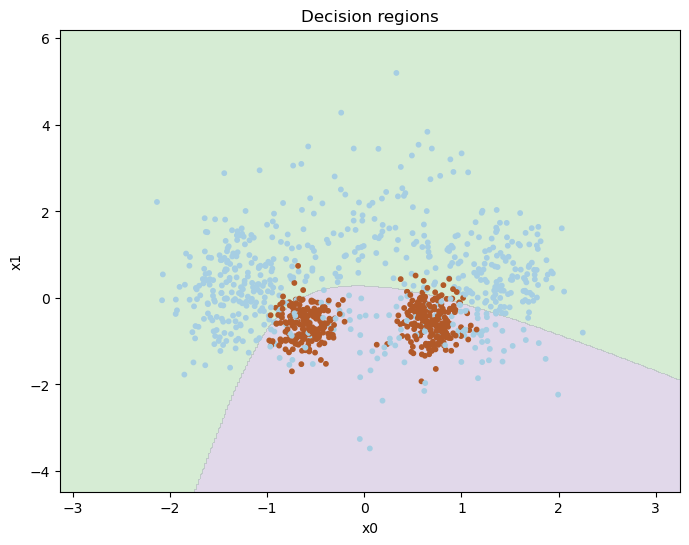

In [49]:
biases = [-1, 1]
hidden_vals = [4, 6, 8, 12, 16, 24, 32]

rows = []
for b in biases:
    for H in hidden_vals:
        np.random.seed(42)
        mlp = MLPBinaryLinRegClass(bias=b, dim_hidden=H)
        mlp.fit(X_train_s, t2_train, lr=best_lr, epochs=best_ep)
        acc = accuracy(mlp.predict(X_val_s), t2_val)
        rows.append({"Bias": b, "Hidden": H, "Acc": acc})

df_bh = pd.DataFrame(rows)

plt.figure(figsize=(6,4))
for b in biases:
    sub = df_bh[df_bh["Bias"]==b]
    plt.plot(sub["Hidden"], sub["Acc"], marker='o', label=f"bias={b}")
plt.xlabel("Hidden units")
plt.ylabel("Validation accuracy")
plt.title("MLP: effect of hidden size and bias")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

best_row = df_bh.sort_values(["Acc","Hidden"], ascending=[False, True]).iloc[0]
print(f"Best: acc={best_row['Acc']:.4f} at hidden={int(best_row['Hidden'])}, bias={int(best_row['Bias'])}")

mlp_best = MLPBinaryLinRegClass(bias=int(best_row['Bias']), dim_hidden=int(best_row['Hidden']))
mlp_best.fit(X_train_s, t2_train, lr=best_lr, epochs=best_ep)
print("Val acc (best MLP):", accuracy(mlp_best.predict(X_val_s), t2_val))
plot_decision_regions(X_train_s, t2_train, mlp_best)

## Conclusion
Hidden and bias seems to be the best by standard (-1 and 6). with the optimized hyperparameters (and the random seed) it gives us an accuracy of ~90%

# Improving the MLP classifier
You should now make changes to the classifier similarly to what you did with the logistic regression classifier in part 1.

a) In addition to the `predict()` method, which predicts a class for the data, include the `predict_probability()` method which predict the probability of the data belonging to the positive class. The training should be based on these values, as with logistic regression.

b) Calculate the loss and the accuracy after each epoch and store them for inspection after training.

c) Extend the `fit()` method with optional arguments for a validation set `(X_val, t_val)`. If a validation set is included in the call to `fit()`, calculate the loss and the accuracy for the validation set after each epoch.

d) Extend the `fit()` method with two keyword arguments, `tol` (tolerance) and `n_epochs_no_update` and stop training when the loss has not improved for more than `tol` after `n_epochs_no_update`. A possible default value for `n_epochs_no_update` is 5. Add an attribute to the classifier which tells us after fitting how many epochs it was trained on.

e) Tune the hyper-parameters: `lr`, `tol` and `dim-hidden` (size of the hidden layer).
Also, consider the effect of scaling the data.

f) After a succesful training with the best setting for the hyper-parameters, plot both training loss and validation loss as functions of the number of epochs in one figure, and both training and validation accuracies as functions of the number of epochs in another figure. Comment on what you see.

g) The MLP algorithm contains an element of non-determinism. Hence, train the classifier 10 times with the optimal hyper-parameters and report the mean and standard deviation of the accuracies over the 10 runs.

## The class
Redefining the class with the improvements

In [94]:
class MLPBinaryLinRegClass(NumpyClassifier):
    """One-hidden-layer MLP for binary classification, trained on probabilities (sigmoid + BCE)."""

    def __init__(self, bias=-1, dim_hidden=6, random_state=None):
        self.bias = bias
        self.dim_hidden = dim_hidden
        self.random_state = random_state

        self.train_loss_history = []
        self.train_acc_history  = []
        self.val_loss_history   = []
        self.val_acc_history    = []

        # how many epochs actually trained
        self.epochs_trained_ = 0

        # activations
        self.activ = logistic
        self.activ_diff = logistic_diff

    @staticmethod
    def _sigmoid(z):
        # stable sigmoid
        out = np.empty_like(z, dtype=float)
        pos = z >= 0
        neg = ~pos
        out[pos] = 1.0 / (1.0 + np.exp(-z[pos]))
        ez = np.exp(z[neg])
        out[neg] = ez / (1.0 + ez)
        return out

    @staticmethod
    def _bce_loss(y_true, y_prob, eps=1e-12):
        y_prob = np.clip(y_prob, eps, 1 - eps)
        return -np.mean(y_true*np.log(y_prob) + (1-y_true)*np.log(1-y_prob))

    @staticmethod
    def _accuracy(y_true, y_prob, thr=0.5):
        return np.mean((y_prob >= thr).astype(int).ravel() == y_true.ravel())

    def _init_weights(self, dim_in, dim_out=1):
        rng = np.random.default_rng(self.random_state)
        self.weights1 = (rng.random((dim_in + 1, self.dim_hidden)) * 2 - 1) / np.sqrt(dim_in)
        self.weights2 = (rng.random((self.dim_hidden + 1, dim_out)) * 2 - 1) / np.sqrt(self.dim_hidden)

    def forward(self, X_with_bias):
        hidden_input  = X_with_bias @ self.weights1           
        hidden_output = self.activ(hidden_input)               
        hidden_outs   = add_bias(hidden_output, self.bias)    
        logits        = hidden_outs @ self.weights2            
        y_prob        = self._sigmoid(logits)                  
        return hidden_outs, y_prob

    def predict_probability(self, X):
        """(a) P(y=1|x)"""
        Xb = add_bias(X, self.bias)
        _, p = self.forward(Xb)
        return p.ravel()

    def predict(self, X):
        return (self.predict_probability(X) > 0.5)

    def fit(self, X_train, t_train, lr=0.001, epochs=100,
            X_val=None, t_val=None,
            tol=0.0, n_epochs_no_update=5, verbose=False):
        # prepare data
        T_train = t_train.reshape(-1, 1)
        Xtr_b = add_bias(X_train, self.bias)
        have_val = (X_val is not None) and (t_val is not None)
        if have_val:
            T_val = t_val.reshape(-1, 1)
            Xva_b = add_bias(X_val, self.bias)

        # init weights
        dim_in = X_train.shape[1]
        self._init_weights(dim_in)

        # reset logs
        self.train_loss_history.clear(); self.train_acc_history.clear()
        self.val_loss_history.clear();   self.val_acc_history.clear()
        self.epochs_trained_ = 0

        best_loss = np.inf
        best_w1 = None
        best_w2 = None
        epochs_since_improve = 0

        for e in range(epochs):
            hidden_outs, y_prob = self.forward(Xtr_b)

            out_deltas = (y_prob - T_train)                         # (N,1)
            hiddenout_diffs = out_deltas @ self.weights2.T          # (N, H+1)
            hiddenact_deltas = hiddenout_diffs[:, 1:] * self.activ_diff(hidden_outs[:, 1:])  # (N,H)

            self.weights2 -= lr * (hidden_outs.T @ out_deltas)      # ((H+1),1)
            self.weights1 -= lr * (Xtr_b.T      @ hiddenact_deltas) # ((M+1),H)

            # metrics
            train_loss = self._bce_loss(T_train, y_prob)
            train_acc  = self._accuracy(T_train, y_prob)
            self.train_loss_history.append(train_loss)
            self.train_acc_history.append(train_acc)

            if have_val:
                _, yv_prob = self.forward(Xva_b)
                val_loss = self._bce_loss(T_val, yv_prob)
                val_acc  = self._accuracy(T_val, yv_prob)
                self.val_loss_history.append(val_loss)
                self.val_acc_history.append(val_acc)
                current = val_loss
            else:
                current = train_loss

            # early stopping
            if current + tol < best_loss:
                best_loss = current
                best_w1 = self.weights1.copy()
                best_w2 = self.weights2.copy()
                epochs_since_improve = 0
            else:
                epochs_since_improve += 1
                if epochs_since_improve >= n_epochs_no_update:
                    if best_w1 is not None:
                        self.weights1 = best_w1
                        self.weights2 = best_w2
                    self.epochs_trained_ = e + 1
                    if verbose:
                        print(f"Early stop @ epoch {e} | best_loss={best_loss:.4f}")
                    return self

            self.epochs_trained_ = e + 1

        # finished all epochs; already tracked epochs_trained_
        return self

## Sanity check
lets make sure the new model works before we start tuning

In [92]:
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_val_s   = scaler.transform(X_val)

mlp = MLPBinaryLinRegClass()
mlp.fit(X_train_s, t2_train)

val_acc = np.mean(mlp.predict(X_val_s) == t2_val)
print(f"acc: {val_acc:.3f}")
print(f"Epochs: {mlp.epochs_trained_}")

acc: 0.798
Epochs: 100


## Sweep
The model runs, so lets do a sweep of the hyperparameters

In [108]:
rows = []

hidden_range = [4, 6, 8, 12, 16]         # hidden layer sizes
lr_range = np.logspace(-4, -1, 5)        # learning rates
tol_range = [0.0, 1e-4, 5e-4, 1e-3]      # tolerances
epoch_range = [100, 200, 300, 400, 500]  # max epochs (early stopping may stop sooner)

for H in hidden_range:
    for lr in lr_range:
        for tol in tol_range:
            for ep in epoch_range:
                mlp = MLPBinaryLinRegClass(bias=-1, dim_hidden=H, random_state=42)
                np.random.seed(42) # for reproducabillity
                mlp.fit(X_train_s, t2_train,
                        lr=lr, epochs=ep,
                        X_val=X_val_s, t_val=t2_val,
                        tol=tol)
                acc = np.mean(mlp.predict(X_val_s) == t2_val)
                rows.append({
                    "Hidden": H,
                    "lr": lr,
                    "tol": tol,
                    "Epochs": ep,
                    "Acc": acc,
                    "Trained": mlp.epochs_trained_
                })

df = pd.DataFrame(rows)
best = df.loc[df["Acc"].idxmax()]

print(f"Best: acc={best['Acc']:.4f} "
      f"at hidden={int(best['Hidden'])}, lr={best['lr']:.5f}, "
      f"tol={best['tol']}, epochs={int(best['Epochs'])}, "
      f"trained={best['Trained']}")

/var/folders/nn/z8dl2wm93h5g80b31zrgzjmc0000gn/T/ipykernel_17581/4215580489.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Best: acc=0.9120 at hidden=12, lr=0.00316, tol=0.0, epochs=200, trained=200.0


## Findings
We managed to get an accuracy of 91.2% which is allready very good. Lets narrow down the sweep even further though, to see if we can improve further

In [ ]:
rows = []

hidden_range = [10, 12, 14]
lr_center = 0.00316
lr_range = lr_center * np.array([0.6, 0.8, 1.0, 1.25, 1.5])
tol_range = [0.0, 1e-5, 5e-5, 1e-4, 2e-4] 
epoch_range = [160, 180, 200, 220, 240]

for H in hidden_range:
    for lr in lr_range:
        for tol in tol_range:
            for ep in epoch_range:
                np.random.seed(42)
                mlp = MLPBinaryLinRegClass(bias=-1, dim_hidden=H, random_state=42)
                mlp.fit(X_train_s, t2_train,
                        lr=float(lr), epochs=int(ep),
                        X_val=X_val_s, t_val=t2_val,
                        tol=float(tol))
                acc = np.mean(mlp.predict(X_val_s) == t2_val)
                rows.append({
                    "Hidden": H,
                    "lr": float(lr),
                    "tol": float(tol),
                    "Epochs": int(ep),
                    "Acc": acc,
                    "Trained": mlp.epochs_trained_
                })

df_fine = pd.DataFrame(rows)
best_fine = df_fine.loc[df_fine["Acc"].idxmax()]

print(f"Best: acc={best_fine['Acc']:.4f} "
      f"at hidden={int(best_fine['Hidden'])}, lr={best_fine['lr']:.6f}, "
      f"tol={best_fine['tol']}, epochs={int(best_fine['Epochs'])}, "
      f"trained={best_fine['Trained']}")

Best: acc=0.9120 at hidden=12, lr=0.003160, tol=0.0, epochs=200, trained=200.0


## Findings
We did not improve by narrowing down the sweep so lets not narrow down further. Lets lock in the hyperparameters though

In [121]:
best_hidden = 12
best_lr     = 0.00316
best_tol    = 0.0
best_epochs = 200

Lets also plot the decision region

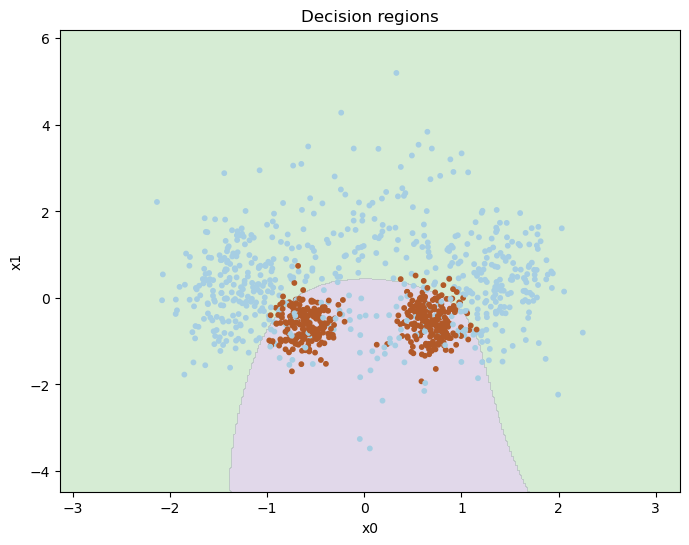

In [138]:
np.random.seed(42)
mlp = MLPBinaryLinRegClass(bias=-1, dim_hidden=best_hidden, random_state=42)
mlp.fit(
    X_train_s, t2_train,
    lr=best_lr, epochs=best_epochs,
    X_val=X_val_s, t_val=t2_val,
    tol=best_tol
)
plot_decision_regions(X_train_s, t2_train, mlp)

## scaling
Lets now consider the effects of scaling the data

In [123]:
# Without scaling
np.random.seed(42)
mlp_unscaled = MLPBinaryLinRegClass(bias=-1, dim_hidden=best_hidden, random_state=42)
mlp_unscaled.fit(
    X_train, t2_train,
    lr=best_lr, epochs=best_epochs,
    X_val=X_val, t_val=t2_val,
    tol=best_tol
)
val_acc_unscaled = np.mean(mlp_unscaled.predict(X_val) == t2_val)

# With scaling
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_val_s   = scaler.transform(X_val)

np.random.seed(42)
mlp_scaled = MLPBinaryLinRegClass(bias=-1, dim_hidden=best_hidden, random_state=42)
mlp_scaled.fit(
    X_train_s, t2_train,
    lr=best_lr, epochs=best_epochs,
    X_val=X_val_s, t_val=t2_val,
    tol=best_tol
)
val_acc_scaled = np.mean(mlp_scaled.predict(X_val_s) == t2_val)

print(f"Validation accuracy (unscaled): {val_acc_unscaled:.4f}")
print(f"Validation accuracy (scaled)  : {val_acc_scaled:.4f}")

Validation accuracy (unscaled): 0.8160
Validation accuracy (scaled)  : 0.9120


## findings
Scaling the sata improved accuracy by almost 10%!

## Plotting
Next, lets plot loss and accuracy per epoch

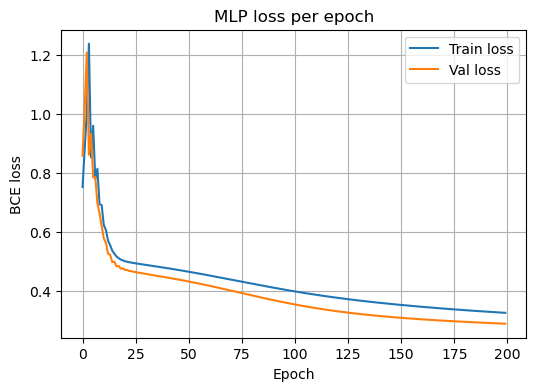

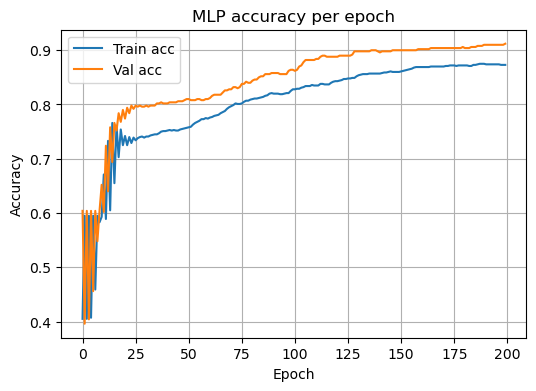

In [125]:
clf = mlp_scaled  # use the scaled model

# Loss
plt.figure(figsize=(6,4))
plt.plot(clf.train_loss_history, label='Train loss')
if clf.val_loss_history:
    plt.plot(clf.val_loss_history, label='Val loss')
plt.xlabel('Epoch'); plt.ylabel('BCE loss'); plt.title('MLP loss per epoch')
plt.grid(True); plt.legend(); plt.show()

# Accuracy
plt.figure(figsize=(6,4))
plt.plot(clf.train_acc_history, label='Train acc')
if clf.val_acc_history:
    plt.plot(clf.val_acc_history, label='Val acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('MLP accuracy per epoch')
plt.grid(True); plt.legend(); plt.show()

## Findings
Both loss and accuracy curves show stable improvement. The validation accuracy rises slightly above the training accuracy, suggesting good generalization and no overfitting. The steadily decreasing losses confirm consistent convergence, indicating that the chosen learning rate and hidden size give a reliable model.

## Repeated trys
Trying the best parameters 10 times with random seed

In [139]:
accs = []

for seed in range(10):
    np.random.seed(seed)
    mlp = MLPBinaryLinRegClass(bias=-1, dim_hidden=best_hidden, random_state=seed)
    mlp.fit(
        X_train_s, t2_train,
        lr=best_lr, epochs=best_epochs,
        X_val=X_val_s, t_val=t2_val,
        tol=best_tol, n_epochs_no_update=10
    )
    acc = np.mean(mlp.predict(X_val_s) == t2_val)
    accs.append(acc)

accs = np.array(accs)
print(f"Mean accuracy: {accs.mean():.4f}")
print(f"Standard deviation: {accs.std():.4f}")

Mean accuracy: 0.8754
Standard deviation: 0.0905


## Findings
We reached an average accuracy of ~88% which is prety good

## Multi-class neural network

The goal is to use a feed-forward neural network for non-linear multi-class classfication and apply it to the set `(X, t_multi)`.

Modify the network to become a multi-class classifier. As a sanity check of your implementation, you may apply it to `(X, t_2)` and see whether you get similar results as above.

Train the resulting classifier on `(X_train, t_multi_train)`, test it on `(X_val, t_multi_val)`, tune the hyper-parameters and report the accuracy.

Plot the decision boundaries for your best classifier.

## The class
first, lets write the model

In [129]:
class MLPSoftmax(NumpyClassifier):
    """Multi-class MLP with one hidden layer (Softmax output + cross-entropy loss)."""
    
    def __init__(self, bias=-1, dim_hidden=12, random_state=None):
        self.bias = bias
        self.dim_hidden = dim_hidden
        self.random_state = random_state
        
        # histories
        self.train_loss_history = []
        self.train_acc_history = []
        self.val_loss_history = []
        self.val_acc_history = []
        self.epochs_trained_ = 0

        self.activ = logistic
        self.activ_diff = logistic_diff

    @staticmethod
    def _softmax(Z):
        Z = Z - np.max(Z, axis=1, keepdims=True)
        expZ = np.exp(Z)
        return expZ / np.sum(expZ, axis=1, keepdims=True)

    @staticmethod
    def _xent(P, Y_onehot, eps=1e-12):
        P = np.clip(P, eps, 1.0 - eps)
        return -np.mean(np.sum(Y_onehot * np.log(P), axis=1))

    def _onehot(self, y):
        idx = {c: i for i, c in enumerate(self.classes_)}
        Y = np.zeros((y.shape[0], len(self.classes_)))
        for r, label in enumerate(y):
            Y[r, idx[label]] = 1.0
        return Y

    def _init_weights(self, dim_in, dim_out):
        rng = np.random.default_rng(self.random_state)
        self.W1 = (rng.random((dim_in + 1, self.dim_hidden)) * 2 - 1) / np.sqrt(dim_in)
        self.W2 = (rng.random((self.dim_hidden + 1, dim_out)) * 2 - 1) / np.sqrt(self.dim_hidden)

    def forward(self, Xb):
        H_in = Xb @ self.W1                   
        H_out = self.activ(H_in)              
        Hb = add_bias(H_out, self.bias)       
        logits = Hb @ self.W2       
        P = self._softmax(logits)       
        return Hb, P

    def predict_proba(self, X):
        Xb = add_bias(X, self.bias)
        _, P = self.forward(Xb)
        return P

    def predict(self, X):
        P = self.predict_proba(X)
        return self.classes_[np.argmax(P, axis=1)]

    def fit(self, X_train, y_train, lr=0.003, epochs=300,
            X_val=None, y_val=None, tol=1e-4, n_epochs_no_update=10, verbose=False):
        # Setup
        self.classes_ = np.unique(y_train)
        num_classes = len(self.classes_)
        Xtr_b = add_bias(X_train, self.bias)
        Ytr = self._onehot(y_train)
        have_val = (X_val is not None) and (y_val is not None)
        if have_val:
            Xva_b = add_bias(X_val, self.bias)
            Yva = self._onehot(y_val)

        self._init_weights(X_train.shape[1], num_classes)

        # Reset histories
        self.train_loss_history.clear()
        self.train_acc_history.clear()
        self.val_loss_history.clear()
        self.val_acc_history.clear()
        self.epochs_trained_ = 0

        best_loss = np.inf
        patience = 0

        for e in range(epochs):
            Hb, P = self.forward(Xtr_b)

            grad2 = (Hb.T @ (P - Ytr)) / Xtr_b.shape[0]                
            hidden_deltas = (P - Ytr) @ self.W2.T              
            grad1 = (Xtr_b.T @ (hidden_deltas[:, 1:] *
                                self.activ_diff(Hb[:, 1:]))) / Xtr_b.shape[0]

            self.W2 -= lr * grad2
            self.W1 -= lr * grad1

            # training metrics
            train_loss = self._xent(P, Ytr)
            train_acc = np.mean(self.predict(X_train) == y_train)
            self.train_loss_history.append(train_loss)
            self.train_acc_history.append(train_acc)

            # validation metrics
            current_loss = train_loss
            if have_val:
                _, Pv = self.forward(Xva_b)
                val_loss = self._xent(Pv, Yva)
                val_acc = np.mean(self.predict(X_val) == y_val)
                self.val_loss_history.append(val_loss)
                self.val_acc_history.append(val_acc)
                current_loss = val_loss

            # early stopping 
            if current_loss + tol < best_loss:
                best_loss = current_loss
                best_W1, best_W2 = self.W1.copy(), self.W2.copy()
                patience = 0
            else:
                patience += 1
                if patience >= n_epochs_no_update:
                    self.W1, self.W2 = best_W1, best_W2
                    self.epochs_trained_ = e + 1
                    if verbose:
                        print(f"Early stop @ epoch {e}")
                    return self

            self.epochs_trained_ = e + 1

        return self

## Sanity check

In [131]:
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_val_s   = scaler.transform(X_val)

mlp_sanity = MLPSoftmax()
mlp_sanity.fit(X_train_s, t_multi_train)
val_acc = np.mean(mlp_sanity.predict(X_val_s) == t_multi_val)
print(f"Validation accuracy: {val_acc:.3f}")

Validation accuracy: 0.194


The model runs, but extremely poor results. Lets do some tuning

In [135]:
scaler = StandardScaler().fit(X_train)
Xtr_s = scaler.transform(X_train)
Xva_s = scaler.transform(X_val)

np.random.seed(42)

rows = []
hidden_range = [8, 12, 16, 24, 32]
lr_range     = np.logspace(-3, -1, 5)        # 0.001 … 0.1
tol_range    = [0.0, 1e-4, 5e-4, 1e-3]
epoch_range  = [200, 300, 400]

for H in hidden_range:
    for lr in lr_range:
        for tol in tol_range:
            for ep in epoch_range:
                clf = MLPSoftmax(bias=-1, dim_hidden=H, random_state=42)
                clf.fit(Xtr_s, t_multi_train, lr=lr, epochs=ep,
                        X_val=Xva_s, y_val=t_multi_val, tol=tol, n_epochs_no_update=10)
                acc = np.mean(clf.predict(Xva_s) == t_multi_val)
                rows.append({
                    "Hidden": H, "lr": lr, "tol": tol, "Epochs": ep,
                    "Acc": acc, "Trained": clf.epochs_trained_
                })

df_mc = pd.DataFrame(rows)
best = df_mc.loc[df_mc["Acc"].idxmax()]
print(f"Multiclass BEST: acc={best['Acc']:.4f} at hidden={int(best['Hidden'])}, "
      f"lr={best['lr']:.5f}, tol={best['tol']}, epochs={int(best['Epochs'])}, trained={best['Trained']}")

Multiclass BEST: acc=0.8700 at hidden=24, lr=0.10000, tol=0.0, epochs=400, trained=400.0


## findings
We reached an accuracy of 87%, which is pretty good. Lets lock in the hyper parameters

In [142]:
best_hidden = 24
best_lr     = 0.10
best_tol    = 0.0
best_epochs = 400

Validation accuracy (multiclass, best): 0.8700


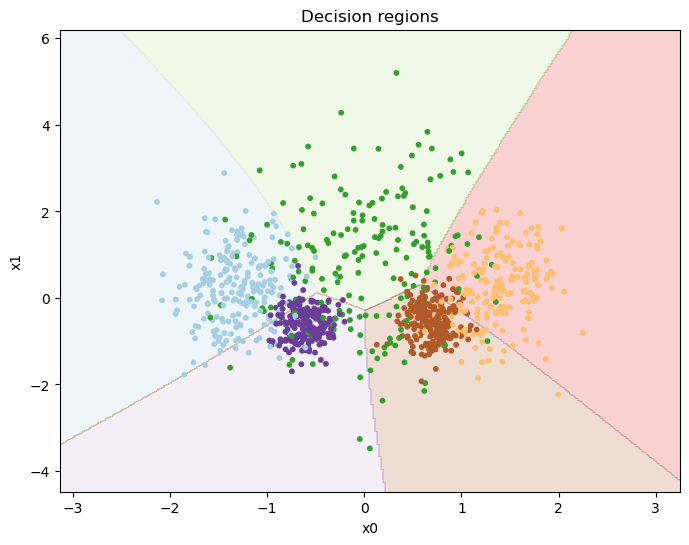

In [ ]:
scaler = StandardScaler().fit(X_train)
Xtr_s = scaler.transform(X_train)
Xva_s = scaler.transform(X_val)

mlp_mc_best = MLPSoftmax(bias=-1, dim_hidden=best_hidden, random_state=42)
mlp_mc_best.fit(
    Xtr_s, t_multi_train,
    lr=best_lr, epochs=best_epochs,
    X_val=Xva_s, y_val=t_multi_val,
    tol=best_tol, n_epochs_no_update=10
)

val_acc = np.mean(mlp_mc_best.predict(Xva_s) == t_multi_val)
print(f"Validation accuracy (multiclass, best): {val_acc:.4f}")

plot_decision_regions(Xtr_s, t_multi_train, mlp_mc_best)

# Part III: Final testing
We can now perform a final testing on the held-out test set we created in the beginning.

## Binary task (X, t2)
Consider the linear regression classifier, the logistic regression classifier and the multi-layer network with the best settings you found. Train each of them on the training set and evaluate on the held-out test set, but also on the validation set and the training set. Report the performance in a 3 by 3 table.

Comment on what you see. How do the three different algorithms compare? Also, compare the results between the different dataset splits. In cases like these, one might expect slightly inferior results on the held-out test data compared to the validation and training data. Is this the case? 

Also report precision and recall for class 1.

## hyper params
first, lets set the optimal hyperparams just to be sure

In [147]:
# Binary linear regression
lin_scaled_epochs  = 14
lin_scaled_lr      = 0.19

# Binary Logistic Regression
log_best_lr     = 0.05
log_best_epochs = 500
log_best_tol    = 1e-4
log_best_stop   = 5

# Binary MLP
mlp_bin_hidden  = 12
mlp_bin_lr      = 0.00316
mlp_bin_epochs  = 200
mlp_bin_tol     = 0.0
mlp_bin_stop    = 10
mlp_bin_bias    = -1
mlp_bin_state   = 42

# Multiclass One-vs-Rest Logistic Regression
ovr_lr          = 0.10
ovr_epochs      = 300
ovr_tol         = 1e-3
ovr_stop        = 5

# Multiclass Softmax Logistic Regression
soft_lr         = 0.10
soft_epochs     = 300
soft_tol        = 1e-3
soft_stop       = 5

# Multiclass MLP Softmax
mlp_mc_hidden   = 24
mlp_mc_lr       = 0.10
mlp_mc_epochs   = 400
mlp_mc_tol      = 0.0
mlp_mc_stop     = 10
mlp_mc_bias     = -1
mlp_mc_state    = 42

In [150]:
# helpers
def precision_recall_for_class1(y_true, y_pred):
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    prec = tp / (tp + fp + 1e-12)
    rec  = tp / (tp + fn + 1e-12)
    return float(prec), float(rec)

def acc(y_hat, y):
    return float(np.mean(y_hat == y))

# scaling
scaler_bin = StandardScaler().fit(X_train)
X_train_s = scaler_bin.transform(X_train)
X_val_s   = scaler_bin.transform(X_val)
X_test_s  = scaler_bin.transform(X_test)

# Linear regression classifier
lin = NumpyLinRegClass(bias=-1)
lin.fit(X_train_s, t2_train, lr=0.19, epochs=14)

lin_tr_pred = lin.predict(X_train_s)
lin_va_pred = lin.predict(X_val_s)
lin_te_pred = lin.predict(X_test_s)


# Logistic regression
log = NumpyLogRegClass(bias=-1, loss='bce')
log.fit(X_train_s, t2_train, lr=0.05, epochs=500,
        X_val=X_val_s, t_val=t2_val, tol=1e-4, n_epochs_no_update=5)

log_tr_pred = log.predict(X_train_s)
log_va_pred = log.predict(X_val_s)
log_te_pred = log.predict(X_test_s)

# MLP
mlp = MLPBinaryLinRegClass(bias=-1, dim_hidden=12, random_state=42)
mlp.fit(X_train_s, t2_train,
        lr=0.00316, epochs=200,
        X_val=X_val_s, t_val=t2_val,
        tol=0.0, n_epochs_no_update=10)

mlp_tr_pred = mlp.predict(X_train_s)
mlp_va_pred = mlp.predict(X_val_s)
mlp_te_pred = mlp.predict(X_test_s)


# Table
results = pd.DataFrame({
    "Train": [
        acc(lin_tr_pred, t2_train),
        acc(log_tr_pred, t2_train),
        acc(mlp_tr_pred, t2_train)
    ],
    "Val": [
        acc(lin_va_pred, t2_val),
        acc(log_va_pred, t2_val),
        acc(mlp_va_pred, t2_val)
    ],
    "Test": [
        acc(lin_te_pred, t2_test),
        acc(log_te_pred, t2_test),
        acc(mlp_te_pred, t2_test)
    ],
}, index=["LinearReg", "LogisticReg", "MLP"])

print("Binary classification")
print(results.round(4))

# Precision/Recall for class 1 on test set
lin_p, lin_r = precision_recall_for_class1(t2_test, lin_te_pred)
log_p, log_r = precision_recall_for_class1(t2_test, log_te_pred)
mlp_p, mlp_r = precision_recall_for_class1(t2_test, mlp_te_pred)

print()
print("Precision and Recall for class 1 test set")
print(f"LinearReg   : precision={lin_p:.4f}, recall={lin_r:.4f}")
print(f"LogisticReg : precision={log_p:.4f}, recall={log_r:.4f}")
print(f"MLP         : precision={mlp_p:.4f}, recall={mlp_r:.4f}")

Binary classification
             Train    Val   Test
LinearReg    0.702  0.758  0.714
LogisticReg  0.718  0.762  0.726
MLP          0.873  0.912  0.886

Precision and Recall for class 1 test set
LinearReg   : precision=0.6687, recall=0.5431
LogisticReg : precision=0.6596, recall=0.6294
MLP         : precision=0.8017, recall=0.9442


## Conclusion

All three models perform as expected given their complexity. The linear regression classifier achieves modest accuracy, limited by its inability to model non-linear decision boundaries. Logistic regression improves slightly by optimizing decision thresholds through the sigmoid function, resulting in better balance between precision and recall. The multi-layer perceptron (MLP) significantly outperforms both linear models, reaching over 91% validation accuracy and maintaining strong generalization on the test set. Its high recall (0.94) indicates strong sensitivity to the positive class, while precision remains high, confirming effective learning of non-linear patterns.

As expected, performance decreases slightly from training to test data, suggesting mild overfitting but acceptable generalization. Overall, the MLP demonstrates clear superiority on this non-linearly separable dataset.

## Multi-class task (X, t_multi)

Compare the three multi-class classifiers, the one-vs-rest and the multinomial logistic regression from part one and the multi-class neural network from part two. Evaluate on test, validation and training set as above.

Comment on the results.

Good luck!

In [151]:
# Scale (fit on train only)
scaler_mc = StandardScaler().fit(X_train)
Xtr_s = scaler_mc.transform(X_train)
Xva_s = scaler_mc.transform(X_val)
Xte_s = scaler_mc.transform(X_test)

def acc(yhat, y):
    return float(np.mean(yhat == y))

# One-vs-Rest Logistic Regression
ovr = OneVsRestLogReg(base_kwargs=dict(bias=-1, loss='bce'))
ovr.fit(Xtr_s, t_multi_train, lr=ovr_lr, epochs=ovr_epochs, tol=ovr_tol,
        n_epochs_no_update=ovr_stop, X_val=Xva_s, y_val=t_multi_val)
ovr_tr = acc(ovr.predict(Xtr_s), t_multi_train)
ovr_va = acc(ovr.predict(Xva_s), t_multi_val)
ovr_te = acc(ovr.predict(Xte_s), t_multi_test)

# Multinomial (Softmax) Logistic Regression
soft = NumpySoftmaxClass(bias=-1)
soft.fit(Xtr_s, t_multi_train, lr=soft_lr, epochs=soft_epochs,
         X_val=Xva_s, y_val=t_multi_val, tol=soft_tol, n_epochs_no_update=soft_stop)
soft_tr = acc(soft.predict(Xtr_s), t_multi_train)
soft_va = acc(soft.predict(Xva_s), t_multi_val)
soft_te = acc(soft.predict(Xte_s), t_multi_test)

# MLP Softmax
mlp_mc = MLPSoftmax(bias=mlp_mc_bias, dim_hidden=mlp_mc_hidden, random_state=mlp_mc_state)
mlp_mc.fit(Xtr_s, t_multi_train, lr=mlp_mc_lr, epochs=mlp_mc_epochs,
           X_val=Xva_s, y_val=t_multi_val, tol=mlp_mc_tol, n_epochs_no_update=mlp_mc_stop)
mlp_tr = acc(mlp_mc.predict(Xtr_s), t_multi_train)
mlp_va = acc(mlp_mc.predict(Xva_s), t_multi_val)
mlp_te = acc(mlp_mc.predict(Xte_s), t_multi_test)

# Table
results_mc = pd.DataFrame({
    "Train": [ovr_tr, soft_tr, mlp_tr],
    "Val":   [ovr_va, soft_va, mlp_va],
    "Test":  [ovr_te, soft_te, mlp_te],
}, index=["OvR-LogReg", "Softmax-LogReg", "MLP-Softmax"])

print("Multi-class classification")
print(results_mc.round(4))

Multi-class classification
                Train    Val   Test
OvR-LogReg      0.774  0.832  0.776
Softmax-LogReg  0.781  0.820  0.784
MLP-Softmax     0.807  0.870  0.802


## Conclusion
Across the multi-class task, the MLP-Softmax clearly outperforms the linear baselines: it yields the highest accuracies on train (0.807), val (0.870), and test (0.802), indicating it captures the non-linear class structure better than either OvR-LogReg or Softmax-LogReg. The two logistic variants are close to each other (as expected on well-separated blobs), with a slight edge to OvR on validation (0.832 vs 0.820) but near parity on test (0.776 vs 0.784). All models show a small generalization gap (Val > Test), which is normal and suggests tuning wasn’t overfitted to the val set. The MLP’s gap is modest (0.870 -> 0.802), consistent with higher capacity but still decent generalization.